In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [83]:
df = pd.read_csv('strava_activities.csv')

# Convert date fields to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['start_date_local'] = pd.to_datetime(df['start_date_local'])

# Add week column based on the start date
df['week'] = df['start_date_local'].dt.isocalendar().week
df["distance"] = df["distance"]/1000

# Convert speed from m/s to min/km
df['average_speed_min_per_km'] = (1000 / df['average_speed']) / 60
df['max_speed_min_per_km'] = (1000 / df['max_speed']) / 60

#display(df)

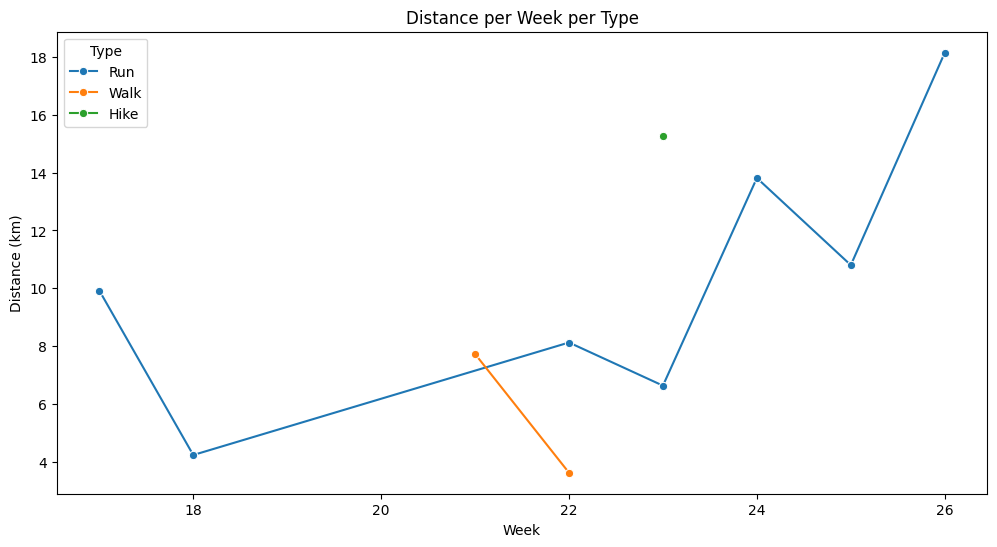

In [84]:
# Distance per week per type
distance_per_week = df.groupby(['week', 'type'])['distance'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=distance_per_week, x='week', y='distance', hue='type',  marker='o')
plt.title('Distance per Week per Type')
plt.xlabel('Week')
plt.ylabel('Distance (km)')
plt.legend(title='Type')
plt.show()

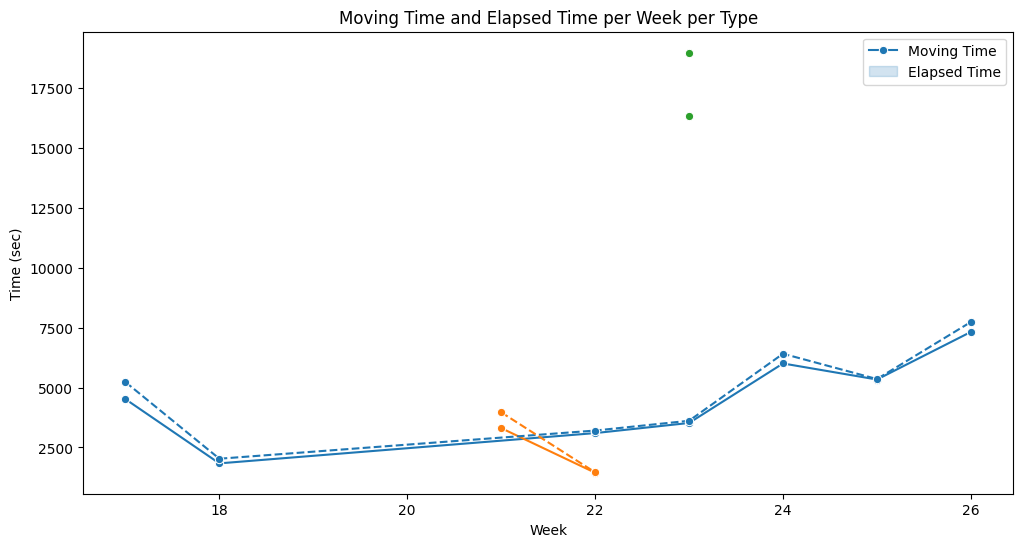

In [85]:
# Moving time and elapsed time per week per type
time_per_week = df.groupby(['week', 'type'])[['moving_time', 'elapsed_time']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_per_week, x='week', y='moving_time', hue='type', marker='o')
sns.lineplot(data=time_per_week, x='week', y='elapsed_time', hue='type', marker='o', linestyle='--')
plt.title('Moving Time and Elapsed Time per Week per Type')
plt.xlabel('Week')
plt.ylabel('Time (sec)')
plt.legend(['Moving Time', 'Elapsed Time'])
plt.show()


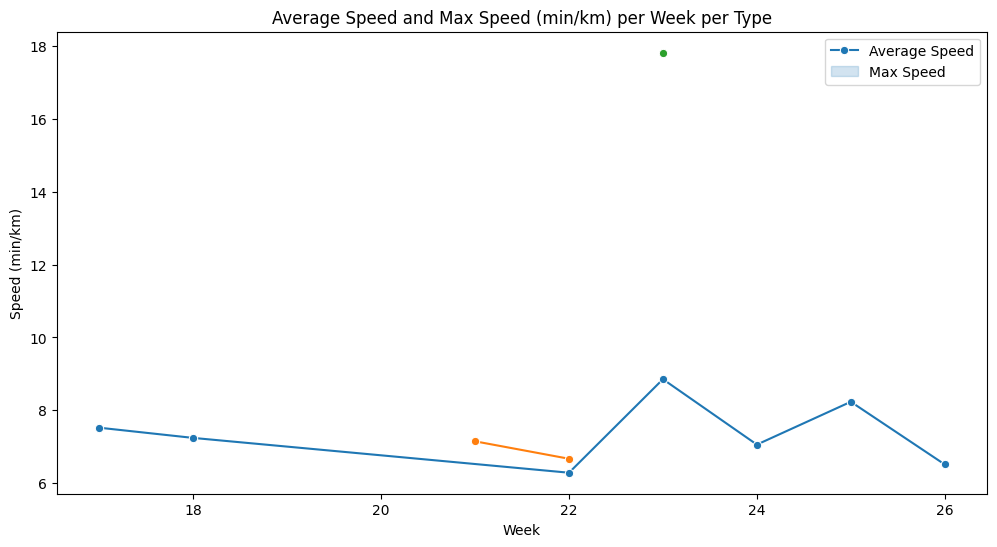

In [86]:
# Average speed and max speed per week per type
speed_per_week = df.groupby(['week', 'type'])[['average_speed_min_per_km', 'max_speed_min_per_km']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=speed_per_week, x='week', y='average_speed_min_per_km', hue='type', marker='o')
#sns.lineplot(data=speed_per_week, x='week', y='max_speed_min_per_km', hue='type', marker='o', linestyle='--')
plt.title('Average Speed and Max Speed (min/km) per Week per Type')
plt.xlabel('Week')
plt.ylabel('Speed (min/km)')
plt.legend(['Average Speed', 'Max Speed'])
plt.show()


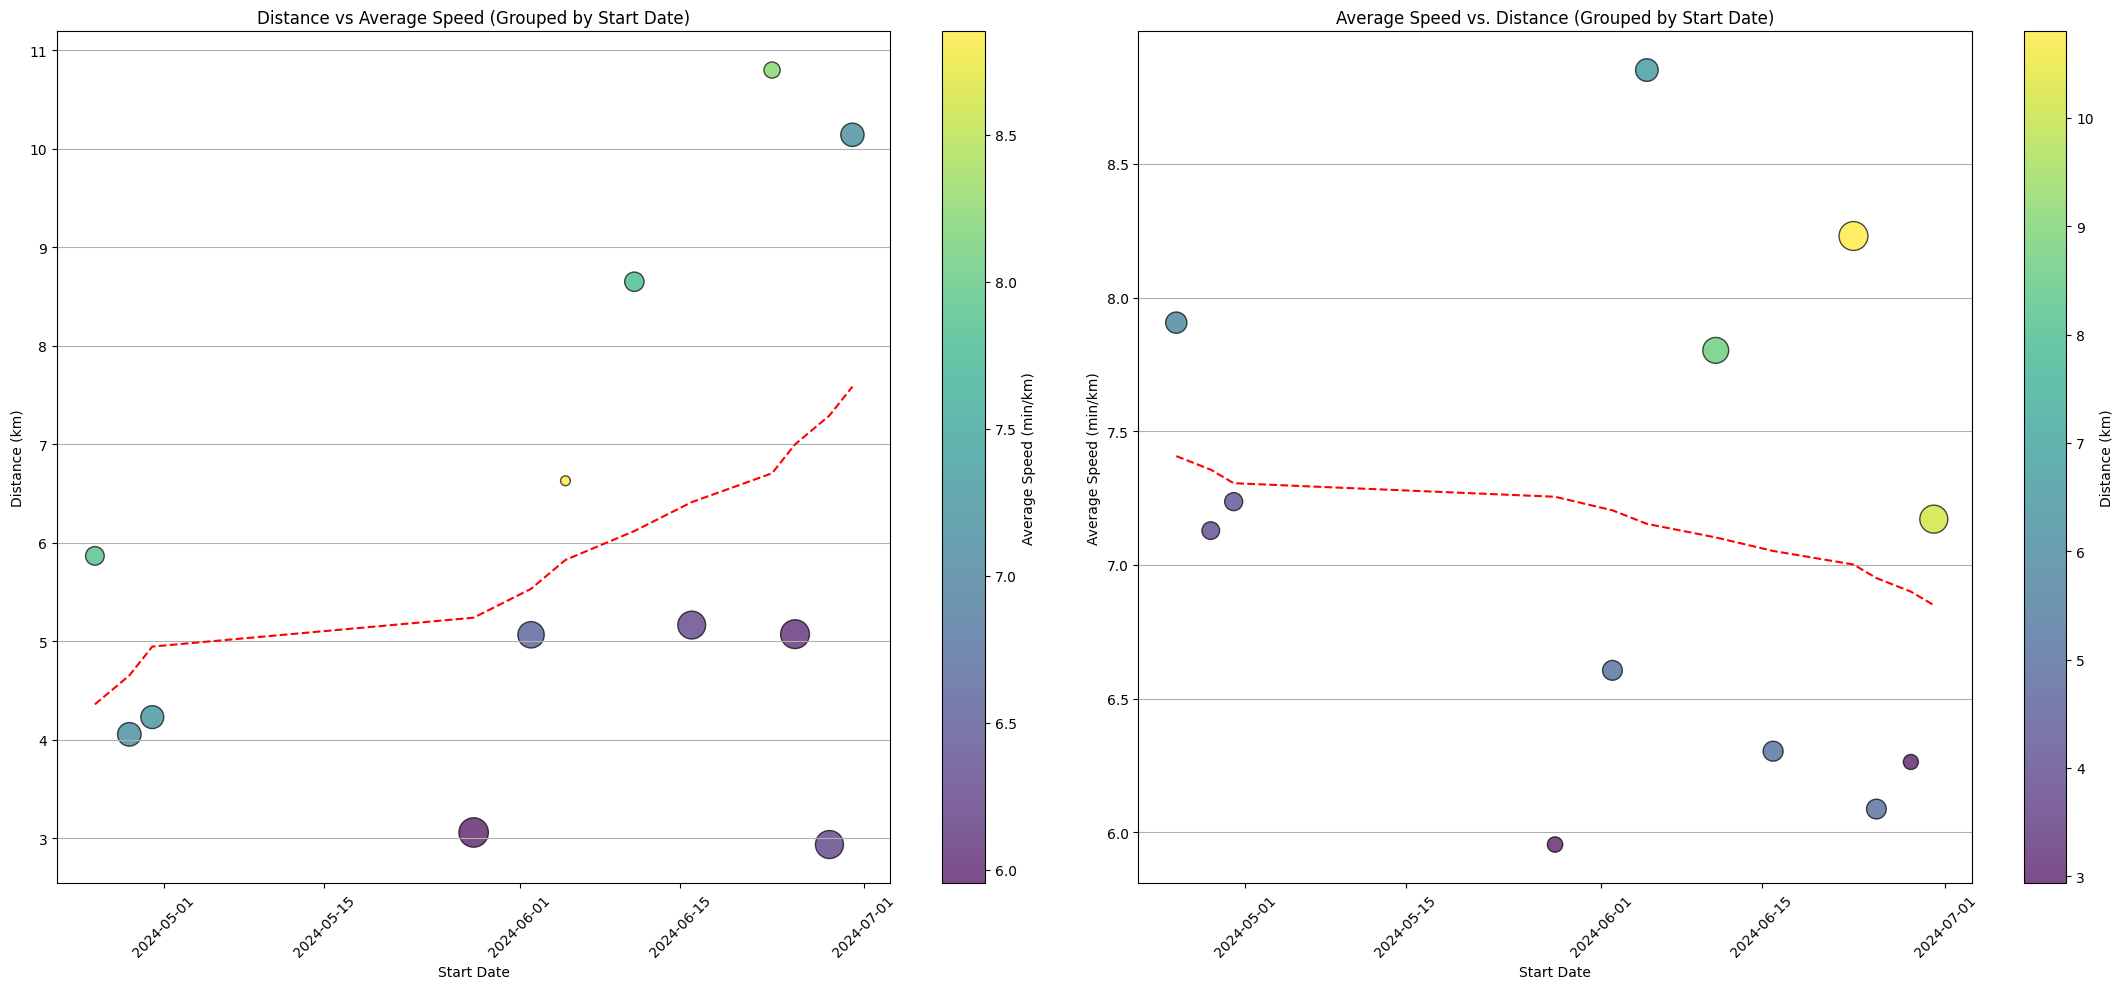

In [87]:

# Gruppiere nach Tag und plotte den Durchschnitt pro Tag
df_run = df[df['type'] == 'Run']
numerical_columns = ['start_date_local', 'distance', 'average_speed_min_per_km']
daily_avg = df_run[numerical_columns].groupby(df_run['start_date_local'].dt.date).mean()

min_speed = daily_avg['average_speed_min_per_km'].min()
max_speed = daily_avg['average_speed_min_per_km'].max()
sizes = 400 * (1 - (daily_avg['average_speed_min_per_km'] - min_speed) / (max_speed - min_speed)) + 50

fig, axes = plt.subplots(1, 2, figsize=(22, 10), sharex=True)

# Erster Plot: Durchschnittsgeschwindigkeit vs. Distanz
scatter1 = axes[0].scatter(
    daily_avg.index,
    daily_avg['distance'],
    c=daily_avg['average_speed_min_per_km'],
    cmap='viridis',
    s=sizes,
    alpha=0.7,
    edgecolor='k',
    label='Average Speed'
)
axes[0].set_title('Distance vs Average Speed (Grouped by Start Date)')
axes[0].set_ylabel('Distance (km)')
axes[0].set_xlabel('Start Date')
axes[0].grid(axis='y')
cbar1 = fig.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Average Speed (min/km)')

# Trendlinie für den ersten Plot
z1 = np.polyfit(np.arange(len(daily_avg.index)), daily_avg['distance'], 1)
p1 = np.poly1d(z1)
axes[0].plot(daily_avg.index, p1(np.arange(len(daily_avg.index))), "r--", label='Trendline')


# ---------------------------------------

# Zweiter Plot: Durchschnittsgeschwindigkeit pro Tag
scatter2 = axes[1].scatter(
    daily_avg.index,
    daily_avg['average_speed_min_per_km'],
    c=daily_avg['distance'],
    cmap='viridis',
    s=daily_avg['distance'] * 40,
    alpha=0.7,
    edgecolor='k',
    label='Distance'
)
axes[1].set_title('Average Speed vs. Distance (Grouped by Start Date)')
axes[1].set_xlabel('Start Date')
axes[1].set_ylabel('Average Speed (min/km)')
axes[1].grid(axis='y')
cbar2 = fig.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Distance (km)')

# Trendlinie für den zweiten Plot
z2 = np.polyfit(np.arange(len(daily_avg.index)), daily_avg['average_speed_min_per_km'], 1)
p2 = np.poly1d(z2)
axes[1].plot(daily_avg.index, p2(np.arange(len(daily_avg.index))), "r--", label='Trendline')

plt.setp(axes[0].get_xticklabels(), rotation=45)
plt.setp(axes[1].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()